# Superhero Attributes and Power Classification

**DSCI 4411 - Fundamentals of Data Mining**  
**The American University in Cairo - Fall 2025**

This project explores classification and clustering techniques using a dataset of superheroes with various attributes such as powers, skills, physical traits, and biography data.

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the dataset
df = pd.read_csv('superhero dataset.csv')
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset Shape: (1200, 17)

Columns: ['height_cm', 'weight_kg', 'age', 'years_active', 'training_hours_per_week', 'civilian_casualties_past_year', 'power_level', 'public_approval_rating', 'super_strength', 'flight', 'energy_projection', 'telepathy', 'healing_factor', 'shape_shifting', 'invisibility', 'telekinesis', 'is_good']


,height_cm,weight_kg,age,years_active,training_hours_per_week,civilian_casualties_past_year,power_level,public_approval_rating,super_strength,flight,energy_projection,telepathy,healing_factor,shape_shifting,invisibility,telekinesis,is_good
0,189.9,81.9,33,10,32.6,2,28.4,62.9,0,1,0,1,0,0,1,1,1
1,177.2,73.6,58,22,41.9,2,67.3,41.4,0,0,0,0,0,0,1,0,1
2,193.0,81.8,47,6,22.3,0,95.9,96.8,0,1,0,0,0,1,1,0,0
3,210.5,88.1,62,26,25.0,4,71.8,53.2,1,0,0,1,0,0,0,0,1
4,175.3,80.7,43,28,24.9,3,81.3,36.1,0,0,0,1,1,1,1,1,0


## 2. Exploratory Data Analysis (EDA)

In [3]:
# Dataset info and statistics
print("Dataset Information:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   height_cm                      1200 non-null   float64
 1   weight_kg                      1200 non-null   float64
 2   age                            1200 non-null   int64  
 3   years_active                   1200 non-null   int64  
 4   training_hours_per_week        1200 non-null   float64
 5   civilian_casualties_past_year  1200 non-null   int64  
 6   power_level                    1200 non-null   float64
 7   public_approval_rating         1200 non-null   float64
 8   super_strength                 1200 non-null   int64  
 9   flight                         1200 non-null   int64  
 10  energy_projection              1200 non-null   int64  
 11  telepathy                      1200 non-null   int64  
 12  healing_factor             

,height_cm,weight_kg,age,years_active,training_hours_per_week,civilian_casualties_past_year,power_level,public_approval_rating,super_strength,flight,energy_projection,telepathy,healing_factor,shape_shifting,invisibility,telekinesis,is_good
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000
mean,181.217833,80.422250,42.325833,15.095833,29.483500,1.893333,70.182333,64.615833,0.287500,0.314167,0.300833,0.304167,0.308333,0.316667,0.31500,0.318333,0.650000
std,18.831243,14.616758,11.323641,8.553905,10.117866,1.896915,15.286139,18.543736,0.452785,0.464377,0.458812,0.460245,0.461998,0.465370,0.46471,0.466024,0.477168
min,150.000000,45.000000,18.000000,0.000000,1.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,167.500000,70.375000,35.000000,8.000000,22.800000,1.000000,59.775000,52.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,181.000000,80.200000,42.000000,15.000000,29.400000,1.000000,70.200000,64.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,193.525000,90.100000,50.000000,22.000000,36.400000,3.000000,81.000000,77.425000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,250.000000,127.900000,84.000000,29.000000,61.000000,13.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
height_cm                        0
weight_kg                        0
age                              0
years_active                     0
training_hours_per_week          0
civilian_casualties_past_year    0
power_level                      0
public_approval_rating           0
super_strength                   0
flight                           0
energy_projection                0
telepathy                        0
healing_factor                   0
shape_shifting                   0
invisibility                     0
telekinesis                      0
is_good                          0
dtype: int64


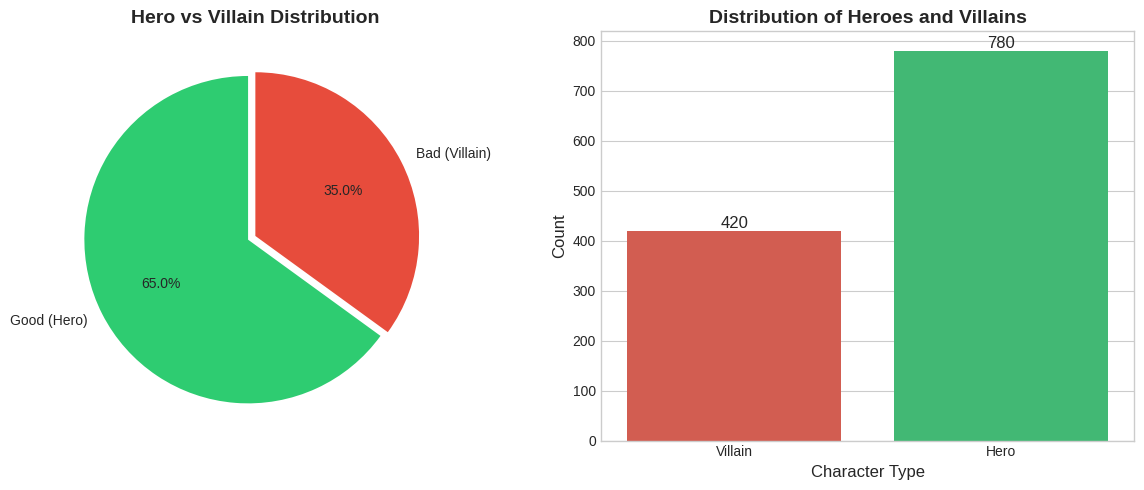

In [5]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
labels = ['Good (Hero)', 'Bad (Villain)']
sizes = df['is_good'].value_counts().sort_index(ascending=False)
axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
axes[0].set_title('Hero vs Villain Distribution', fontsize=14, fontweight='bold')

# Bar chart
ax = sns.countplot(data=df, x='is_good', palette=colors[::-1], ax=axes[1])
axes[1].set_xticklabels(['Villain', 'Hero'])
axes[1].set_xlabel('Character Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Distribution of Heroes and Villains', fontsize=14, fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Create figures directory
import os
os.makedirs('figures', exist_ok=True)

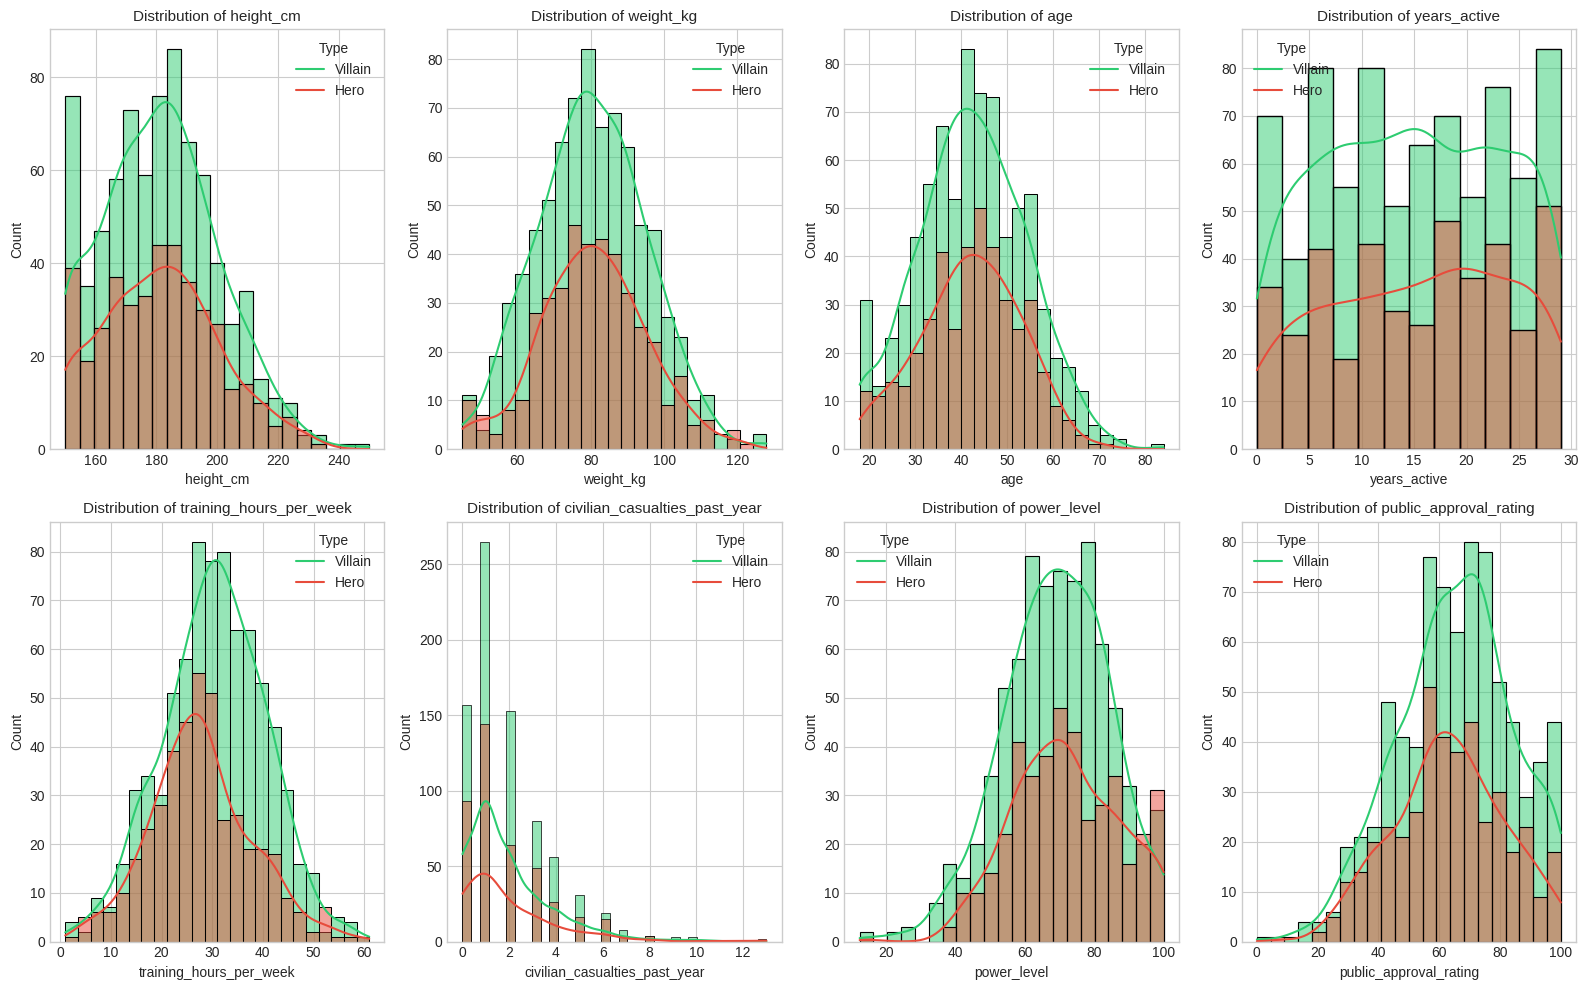

In [7]:
# Distribution of numerical features
numerical_cols = ['height_cm', 'weight_kg', 'age', 'years_active', 
                  'training_hours_per_week', 'civilian_casualties_past_year',
                  'power_level', 'public_approval_rating']

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='is_good', kde=True, ax=axes[i], palette=colors[::-1])
    axes[i].set_title(f'Distribution of {col}', fontsize=11)
    axes[i].legend(['Villain', 'Hero'], title='Type')

plt.tight_layout()
plt.savefig('figures/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

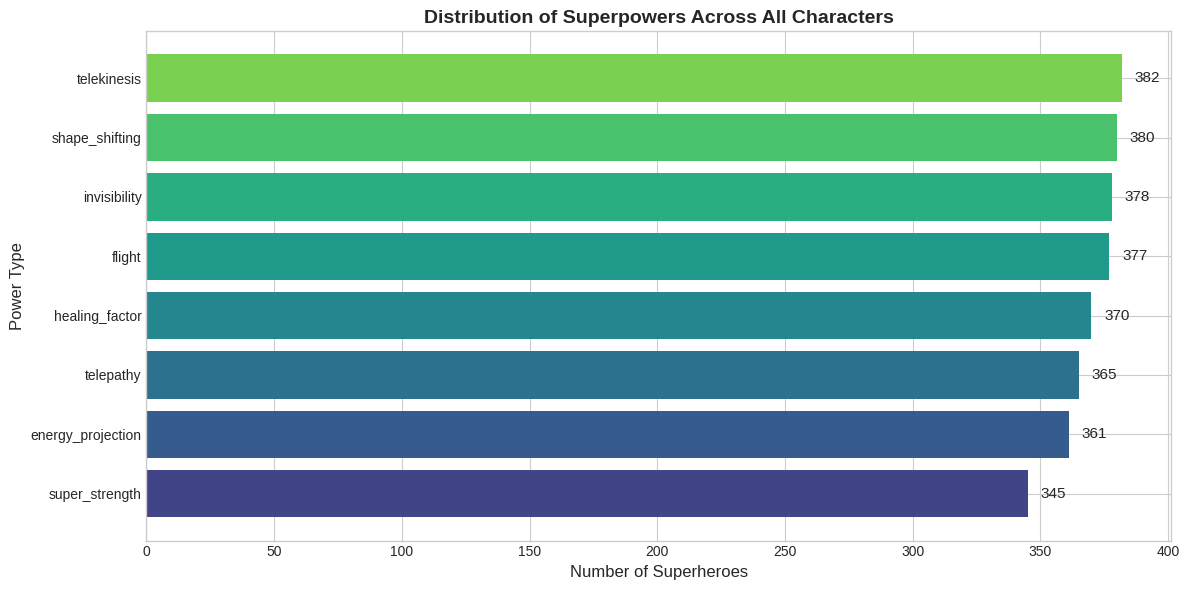

In [8]:
# Power distribution analysis
power_cols = ['super_strength', 'flight', 'energy_projection', 'telepathy', 
              'healing_factor', 'shape_shifting', 'invisibility', 'telekinesis']

power_counts = df[power_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
colors_power = plt.cm.viridis(np.linspace(0.2, 0.8, len(power_counts)))
bars = plt.barh(power_counts.index, power_counts.values, color=colors_power)
plt.xlabel('Number of Superheroes', fontsize=12)
plt.ylabel('Power Type', fontsize=12)
plt.title('Distribution of Superpowers Across All Characters', fontsize=14, fontweight='bold')

for bar, count in zip(bars, power_counts.values):
    plt.text(count + 5, bar.get_y() + bar.get_height()/2, f'{count}', 
             va='center', fontsize=11)

plt.tight_layout()
plt.savefig('figures/power_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

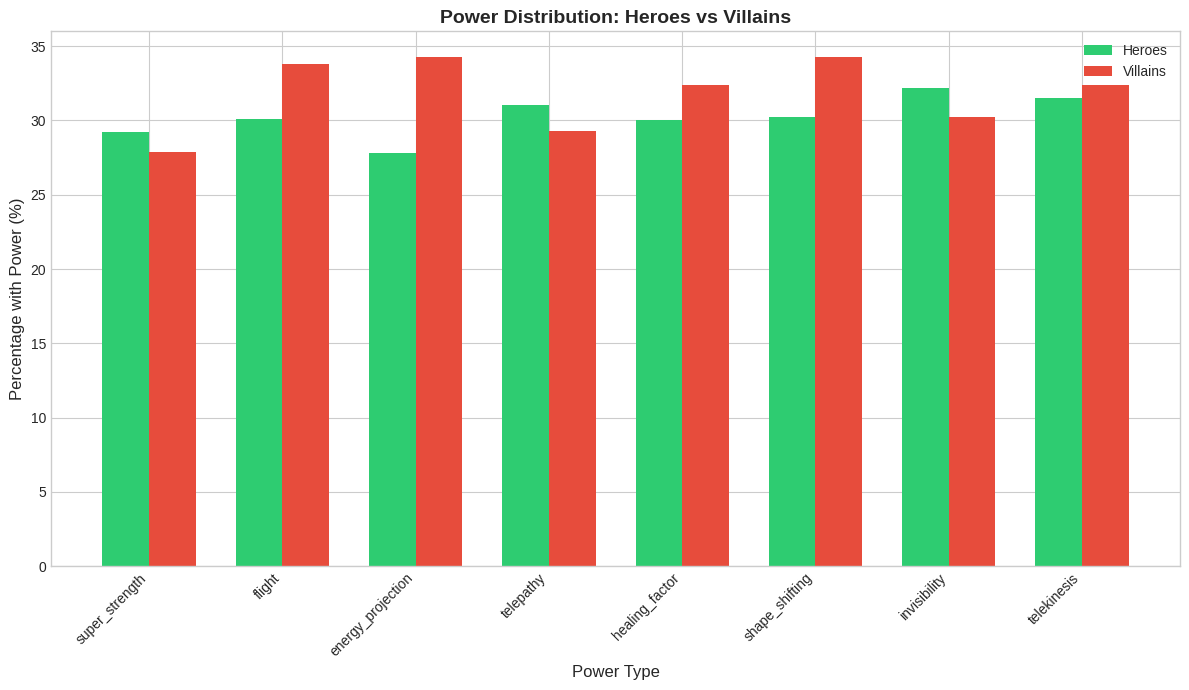

In [9]:
# Power comparison: Heroes vs Villains
hero_powers = df[df['is_good'] == 1][power_cols].mean()
villain_powers = df[df['is_good'] == 0][power_cols].mean()

power_comparison = pd.DataFrame({
    'Heroes': hero_powers * 100,
    'Villains': villain_powers * 100
})

plt.figure(figsize=(12, 7))
x = np.arange(len(power_cols))
width = 0.35

bars1 = plt.bar(x - width/2, power_comparison['Heroes'], width, label='Heroes', color='#2ecc71')
bars2 = plt.bar(x + width/2, power_comparison['Villains'], width, label='Villains', color='#e74c3c')

plt.xlabel('Power Type', fontsize=12)
plt.ylabel('Percentage with Power (%)', fontsize=12)
plt.title('Power Distribution: Heroes vs Villains', fontsize=14, fontweight='bold')
plt.xticks(x, power_cols, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.savefig('figures/hero_villain_powers.png', dpi=300, bbox_inches='tight')
plt.show()

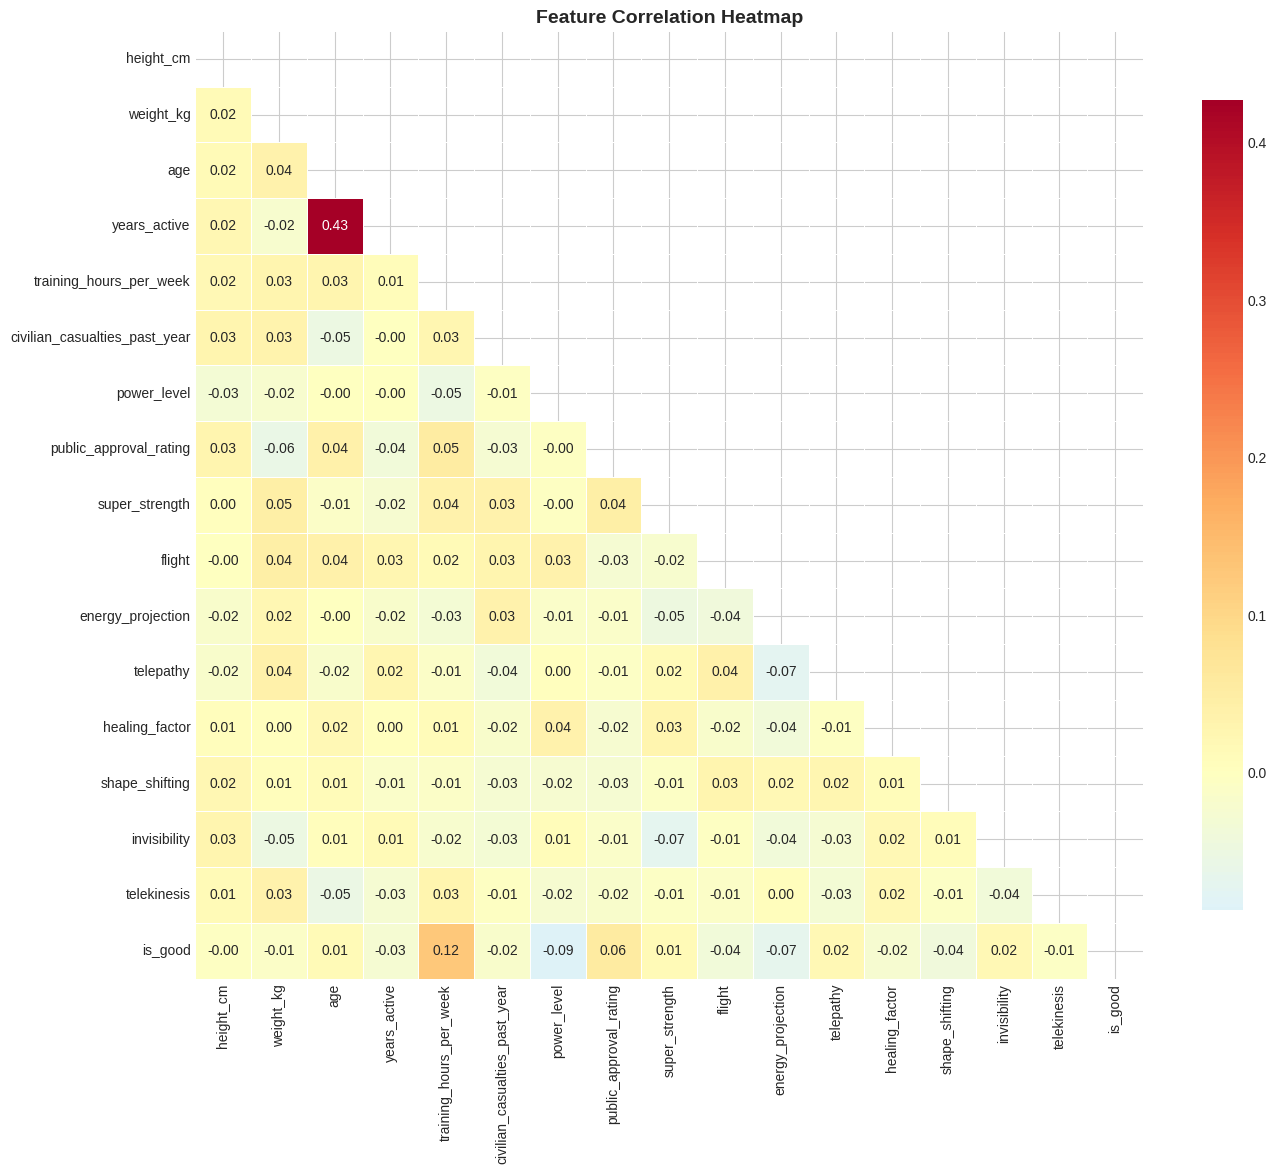

In [10]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

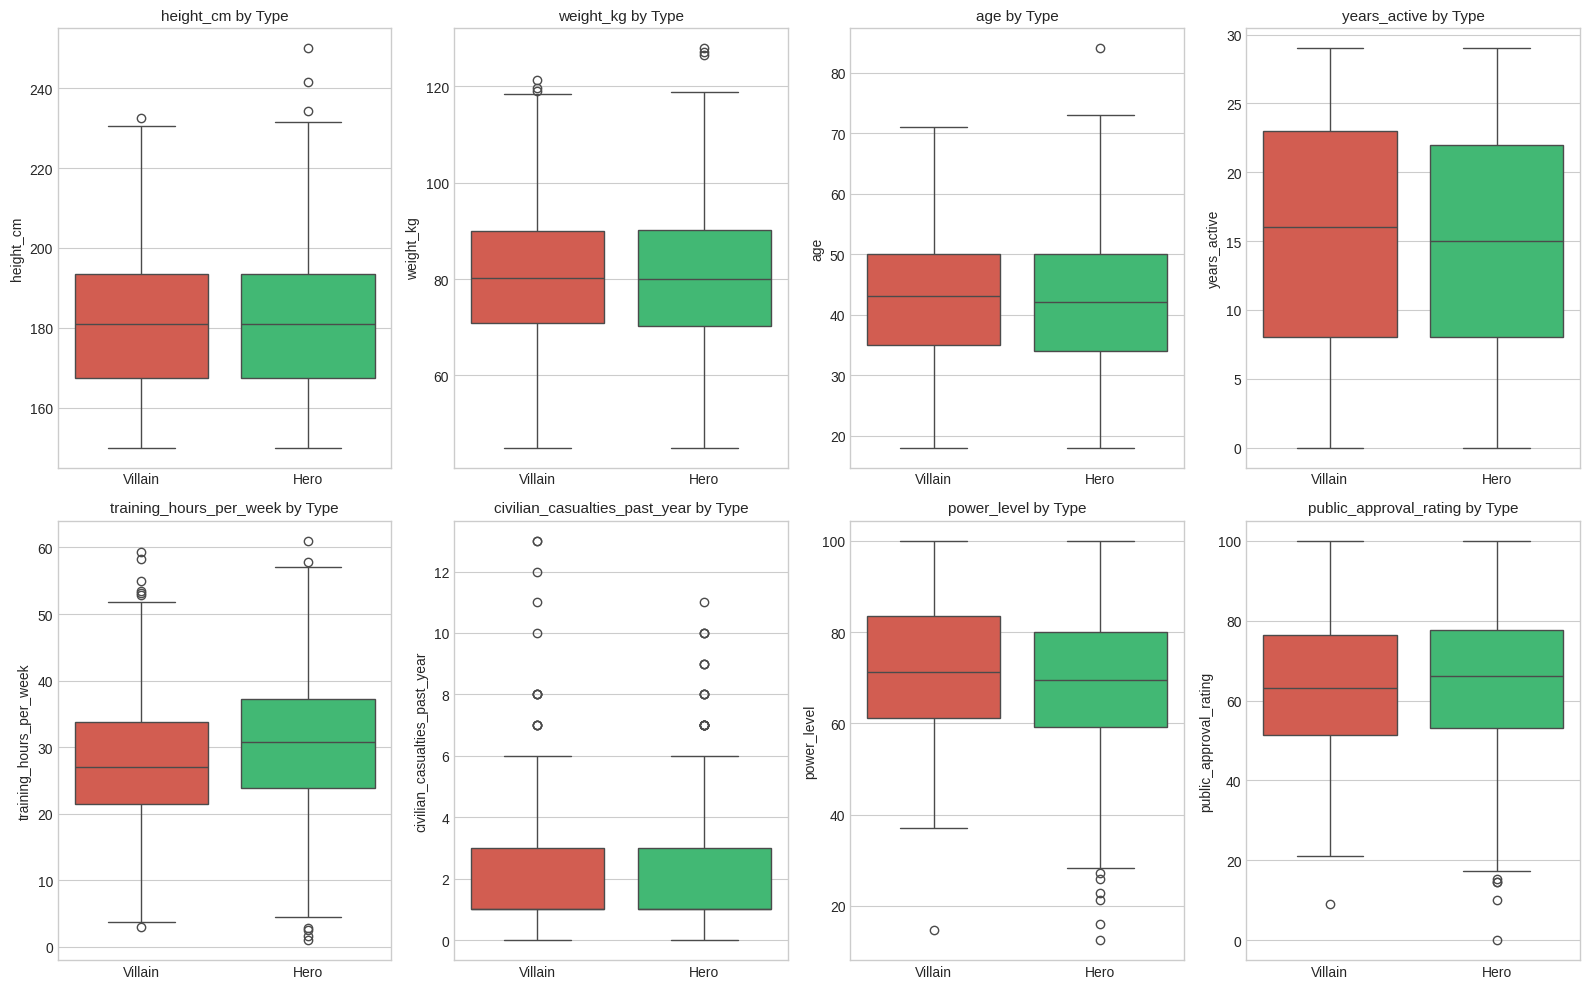

In [11]:
# Box plots comparing heroes vs villains for key metrics
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='is_good', y=col, palette=colors[::-1], ax=axes[i])
    axes[i].set_xticklabels(['Villain', 'Hero'])
    axes[i].set_xlabel('')
    axes[i].set_title(f'{col} by Type', fontsize=11)

plt.tight_layout()
plt.savefig('figures/boxplots_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Data Preprocessing

In [12]:
# Prepare features and target
X = df.drop('is_good', axis=1)
y = df['is_good']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget class distribution:")
print(y.value_counts())

Features shape: (1200, 16)
Target shape: (1200,)

Target class distribution:
is_good
1    780
0    420
Name: count, dtype: int64


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 960
Testing set size: 240


In [14]:
# Scale numerical features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")

Feature scaling completed.


## 4. Classification Models

### 4.1 Logistic Regression

In [15]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr_model.predict(X_test_scaled)

# Evaluation
print("=" * 50)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 50)
print(f"\nAccuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, lr_pred, target_names=['Villain', 'Hero']))

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

LOGISTIC REGRESSION RESULTS

Accuracy: 0.6500

Classification Report:
              precision    recall  f1-score   support

     Villain       0.50      0.07      0.12        84
        Hero       0.66      0.96      0.78       156

    accuracy                           0.65       240
   macro avg       0.58      0.52      0.45       240
weighted avg       0.60      0.65      0.55       240

Cross-Validation Accuracy: 0.6406 (+/- 0.0355)


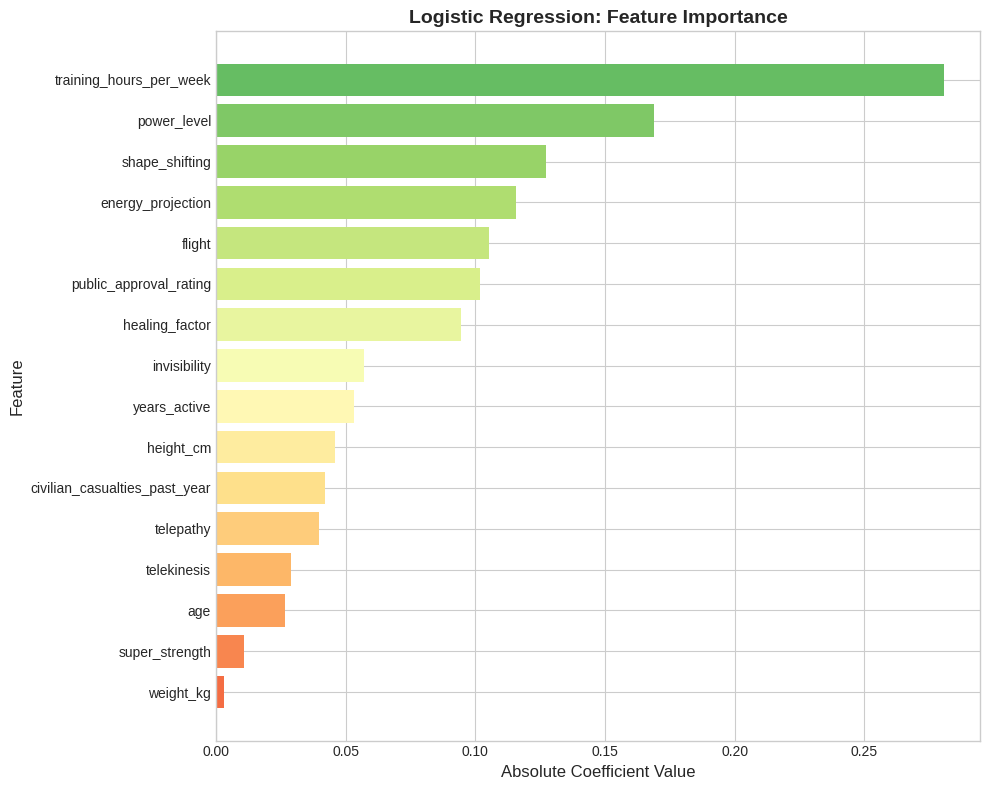

In [16]:
# Feature importance for Logistic Regression
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(lr_model.coef_[0])
}).sort_values('coefficient', ascending=True)

plt.figure(figsize=(10, 8))
colors_feat = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance_lr)))
plt.barh(feature_importance_lr['feature'], feature_importance_lr['coefficient'], color=colors_feat)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Logistic Regression: Feature Importance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/lr_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Random Forest Classifier

In [17]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
print("=" * 50)
print("RANDOM FOREST RESULTS")
print("=" * 50)
print(f"\nAccuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=['Villain', 'Hero']))

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

RANDOM FOREST RESULTS

Accuracy: 0.6333

Classification Report:
              precision    recall  f1-score   support

     Villain       0.42      0.12      0.19        84
        Hero       0.66      0.91      0.76       156

    accuracy                           0.63       240
   macro avg       0.54      0.51      0.47       240
weighted avg       0.57      0.63      0.56       240



Cross-Validation Accuracy: 0.6427 (+/- 0.0376)


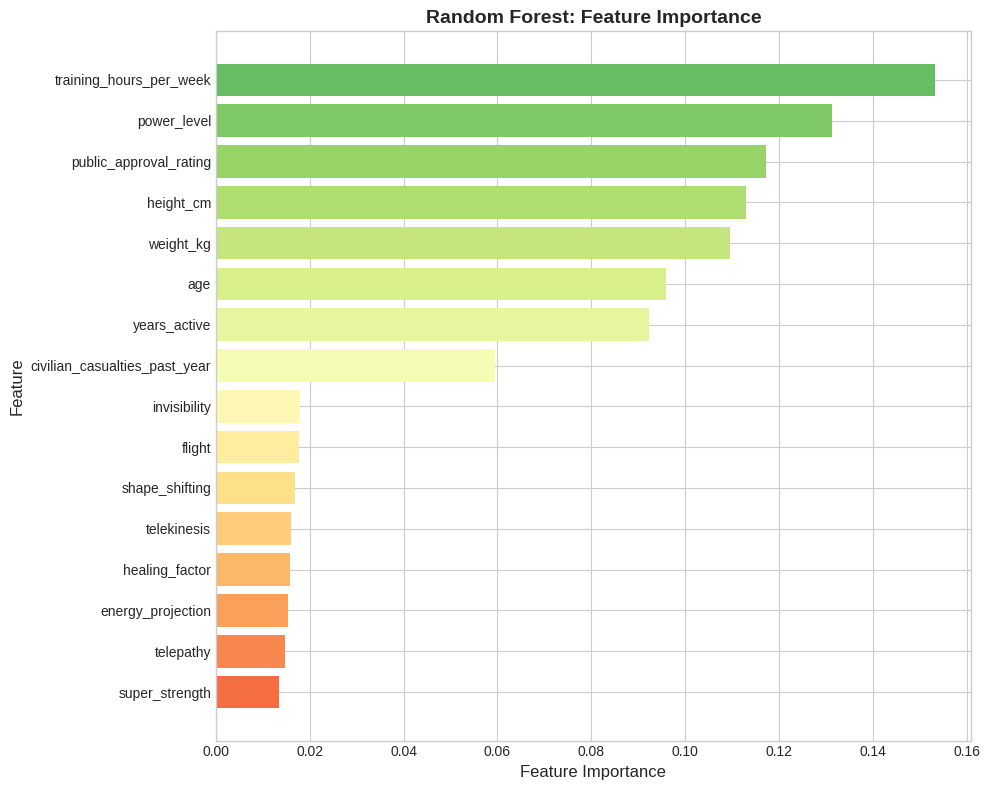

In [18]:
# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 8))
colors_feat = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance_rf)))
plt.barh(feature_importance_rf['feature'], feature_importance_rf['importance'], color=colors_feat)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest: Feature Importance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Support Vector Machine (SVM)

In [19]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
svm_pred = svm_model.predict(X_test_scaled)

# Evaluation
print("=" * 50)
print("SUPPORT VECTOR MACHINE RESULTS")
print("=" * 50)
print(f"\nAccuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=['Villain', 'Hero']))

# Cross-validation
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores_svm.mean():.4f} (+/- {cv_scores_svm.std() * 2:.4f})")

SUPPORT VECTOR MACHINE RESULTS

Accuracy: 0.6208

Classification Report:
              precision    recall  f1-score   support

     Villain       0.27      0.05      0.08        84
        Hero       0.64      0.93      0.76       156

    accuracy                           0.62       240
   macro avg       0.46      0.49      0.42       240
weighted avg       0.51      0.62      0.52       240

Cross-Validation Accuracy: 0.6521 (+/- 0.0042)


### 4.4 Model Comparison

In [20]:
# Model comparison summary
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Test Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred)
    ],
    'CV Accuracy Mean': [cv_scores_lr.mean(), cv_scores_rf.mean(), cv_scores_svm.mean()],
    'CV Accuracy Std': [cv_scores_lr.std(), cv_scores_rf.std(), cv_scores_svm.std()]
})

print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)
print(models_comparison.to_string(index=False))


MODEL COMPARISON SUMMARY
              Model  Test Accuracy  CV Accuracy Mean  CV Accuracy Std
Logistic Regression       0.650000          0.640625         0.017739
      Random Forest       0.633333          0.642708         0.018808
                SVM       0.620833          0.652083         0.002083


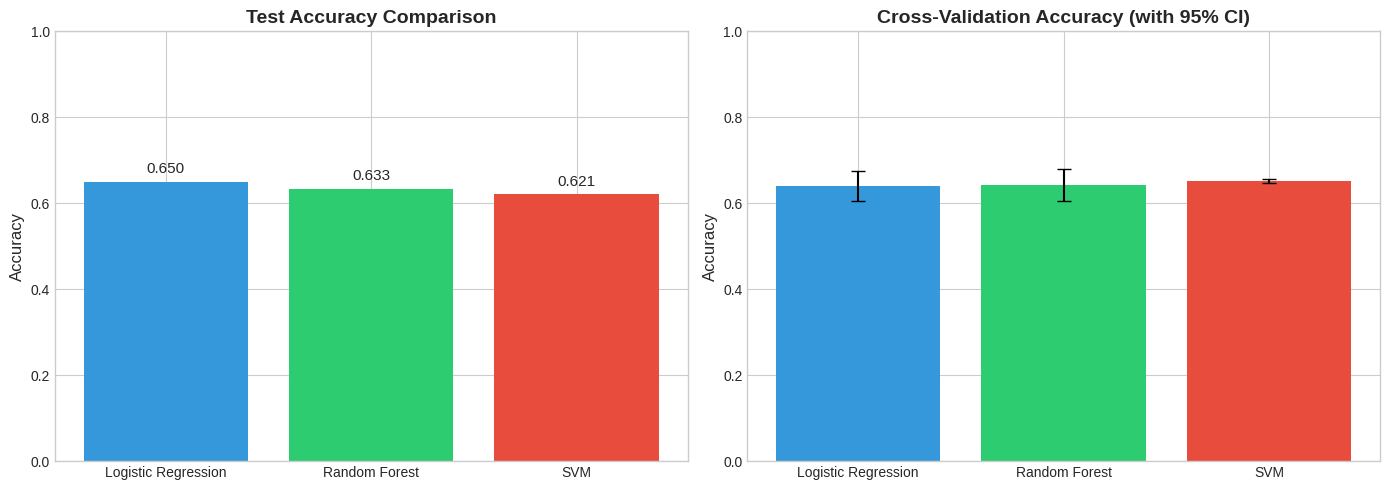

In [21]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for accuracy comparison
colors_models = ['#3498db', '#2ecc71', '#e74c3c']
x = np.arange(len(models_comparison))
axes[0].bar(x, models_comparison['Test Accuracy'], color=colors_models)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_comparison['Model'])
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
for i, v in enumerate(models_comparison['Test Accuracy']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=11)

# Cross-validation with error bars
axes[1].bar(x, models_comparison['CV Accuracy Mean'], 
            yerr=models_comparison['CV Accuracy Std'] * 2,
            color=colors_models, capsize=5)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models_comparison['Model'])
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Cross-Validation Accuracy (with 95% CI)', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

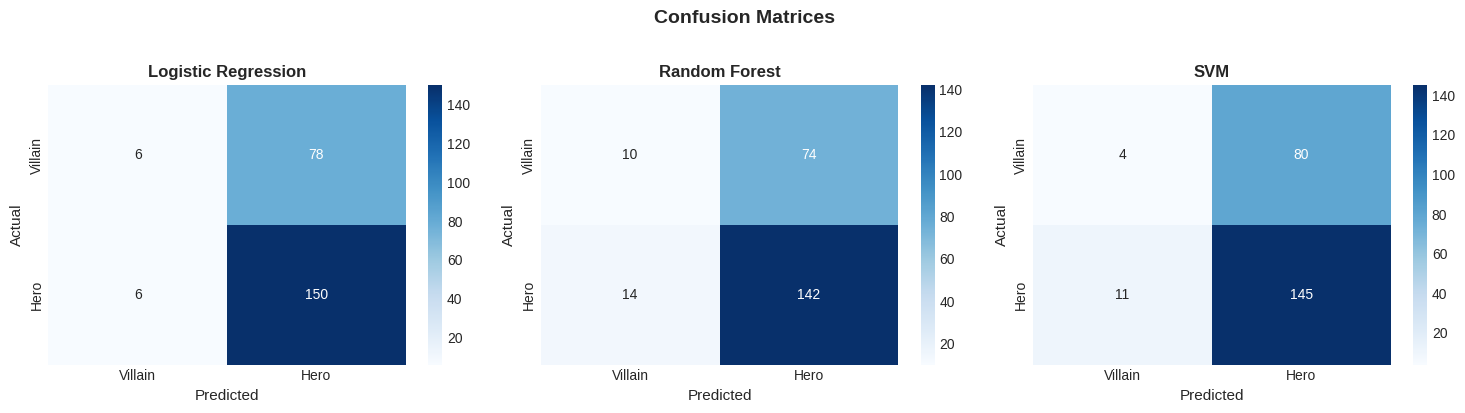

In [22]:
# Confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

predictions = [lr_pred, rf_pred, svm_pred]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

for i, (pred, name) in enumerate(zip(predictions, model_names)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Villain', 'Hero'], yticklabels=['Villain', 'Hero'])
    axes[i].set_xlabel('Predicted', fontsize=11)
    axes[i].set_ylabel('Actual', fontsize=11)
    axes[i].set_title(f'{name}', fontsize=12, fontweight='bold')

plt.suptitle('Confusion Matrices', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('figures/confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Clustering Analysis

### 5.1 Finding Optimal Number of Clusters

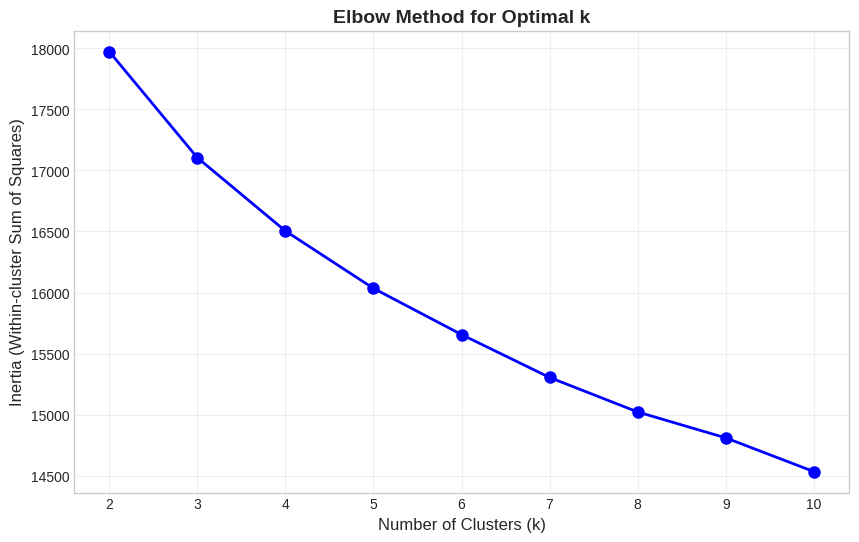

In [23]:
# Prepare data for clustering (using all features)
X_cluster = scaler.fit_transform(X)

# Elbow method to find optimal k
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.savefig('figures/elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

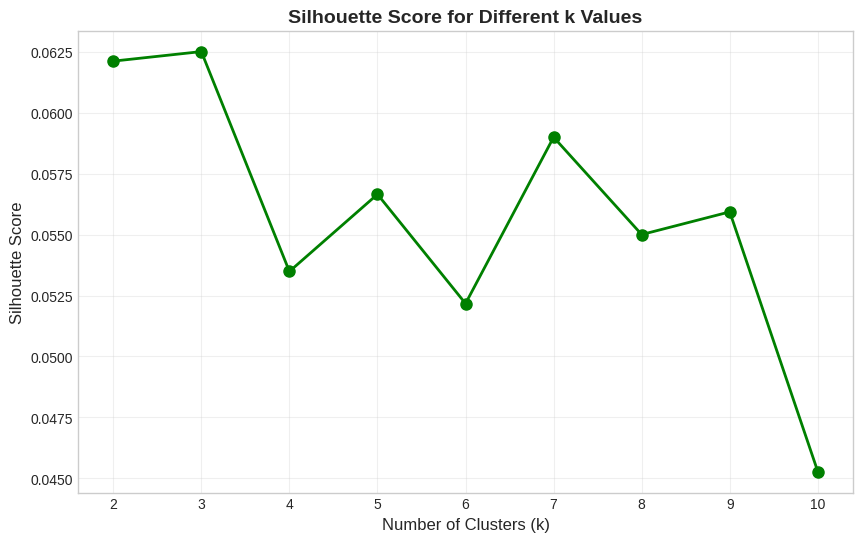


Optimal number of clusters based on Silhouette Score: 3


In [24]:
# Silhouette score analysis
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster)
    silhouette_scores.append(silhouette_score(X_cluster, labels))

plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for Different k Values', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.savefig('figures/silhouette_scores.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

### 5.2 K-Means Clustering with Optimal k

In [25]:
# Perform K-Means clustering with optimal k (using k=4 for interpretable archetypes)
n_clusters = 4  # Using 4 clusters for interesting superhero archetypes

kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster)

# Add cluster labels to dataframe
df['cluster'] = cluster_labels

print(f"Cluster Distribution:")
print(df['cluster'].value_counts().sort_index())

Cluster Distribution:
cluster
0    305
1    341
2    271
3    283
Name: count, dtype: int64


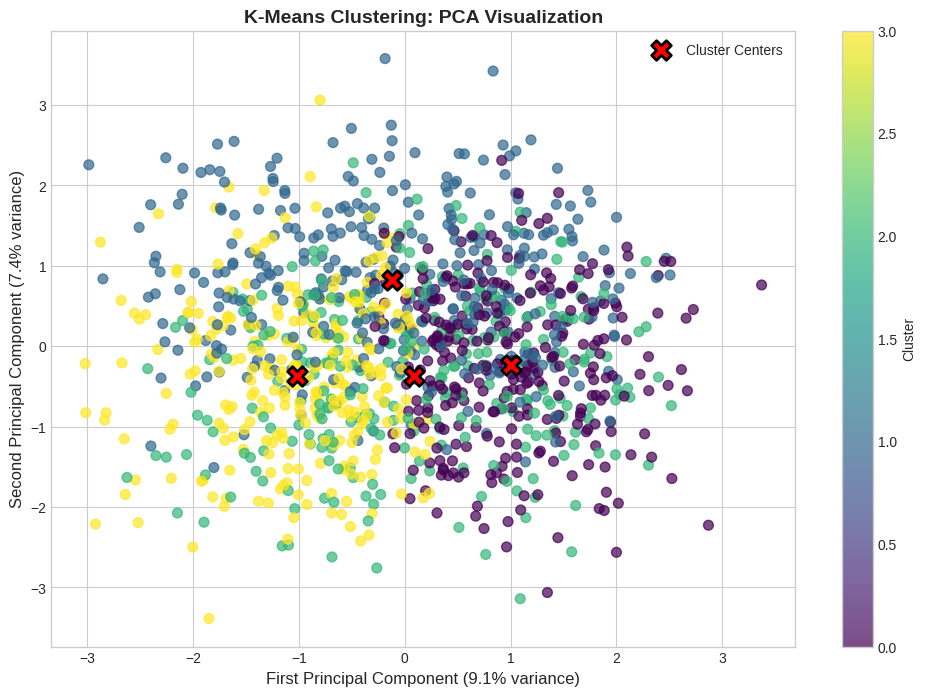


Total variance explained by 2 PCs: 16.45%


In [26]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                      cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('K-Means Clustering: PCA Visualization', fontsize=14, fontweight='bold')

# Plot cluster centers
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', 
            s=200, edgecolors='black', linewidths=2, label='Cluster Centers')
plt.legend()
plt.savefig('figures/clustering_pca.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal variance explained by 2 PCs: {sum(pca.explained_variance_ratio_)*100:.2f}%")

In [27]:
# Cluster profiling
cluster_profiles = df.groupby('cluster').mean()

print("\n" + "=" * 60)
print("CLUSTER PROFILES")
print("=" * 60)

for cluster in range(n_clusters):
    print(f"\n--- Cluster {cluster} ({len(df[df['cluster']==cluster])} members) ---")
    profile = cluster_profiles.loc[cluster]
    print(f"  Average Power Level: {profile['power_level']:.1f}")
    print(f"  Public Approval: {profile['public_approval_rating']:.1f}%")
    print(f"  % Heroes: {profile['is_good']*100:.1f}%")
    print(f"  Training Hours/Week: {profile['training_hours_per_week']:.1f}")
    print(f"  Civilian Casualties: {profile['civilian_casualties_past_year']:.2f}")
    
    # Top powers
    power_profile = profile[power_cols].sort_values(ascending=False)
    print(f"  Top Powers: {', '.join(power_profile.head(3).index.tolist())}")


CLUSTER PROFILES

--- Cluster 0 (305 members) ---
  Average Power Level: 70.9
  Public Approval: 65.9%
  % Heroes: 66.2%
  Training Hours/Week: 29.8
  Civilian Casualties: 1.70
  Top Powers: flight, invisibility, healing_factor

--- Cluster 1 (341 members) ---
  Average Power Level: 70.0
  Public Approval: 65.9%
  % Heroes: 66.0%
  Training Hours/Week: 30.1
  Civilian Casualties: 1.99
  Top Powers: super_strength, healing_factor, telepathy

--- Cluster 2 (271 members) ---
  Average Power Level: 69.4
  Public Approval: 62.6%
  % Heroes: 64.2%
  Training Hours/Week: 29.1
  Civilian Casualties: 1.79
  Top Powers: shape_shifting, flight, invisibility

--- Cluster 3 (283 members) ---
  Average Power Level: 70.3
  Public Approval: 63.6%
  % Heroes: 63.3%
  Training Hours/Week: 28.7
  Civilian Casualties: 2.08
  Top Powers: energy_projection, telekinesis, invisibility


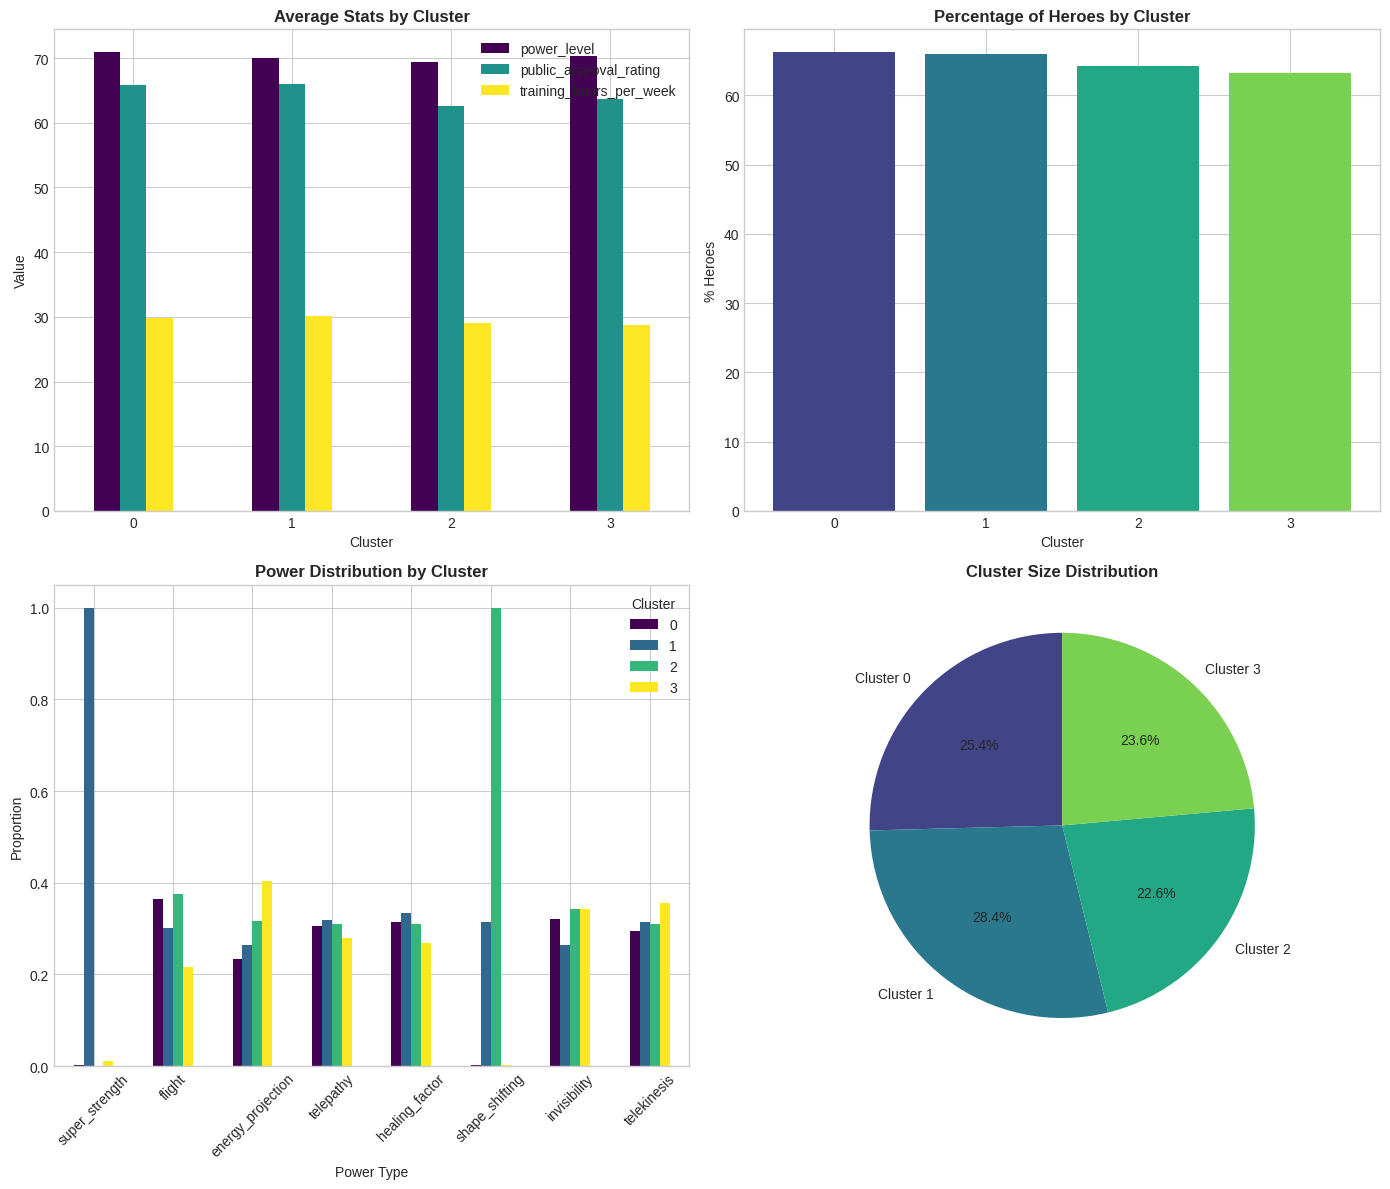

In [28]:
# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Average stats by cluster
stats_cols = ['power_level', 'public_approval_rating', 'training_hours_per_week']
cluster_stats = cluster_profiles[stats_cols]
cluster_stats.plot(kind='bar', ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title('Average Stats by Cluster', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Value')
axes[0, 0].legend(loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=0)

# Plot 2: Hero ratio by cluster
hero_ratio = cluster_profiles['is_good'] * 100
colors_clusters = plt.cm.viridis(np.linspace(0.2, 0.8, n_clusters))
axes[0, 1].bar(range(n_clusters), hero_ratio, color=colors_clusters)
axes[0, 1].set_title('Percentage of Heroes by Cluster', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('% Heroes')
axes[0, 1].set_xticks(range(n_clusters))

# Plot 3: Power distribution by cluster
power_by_cluster = cluster_profiles[power_cols].T
power_by_cluster.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Power Distribution by Cluster', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Power Type')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Cluster', loc='upper right')

# Plot 4: Cluster size
cluster_sizes = df['cluster'].value_counts().sort_index()
axes[1, 1].pie(cluster_sizes, labels=[f'Cluster {i}' for i in range(n_clusters)],
               autopct='%1.1f%%', colors=colors_clusters, startangle=90)
axes[1, 1].set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('figures/cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Assign archetype names based on cluster characteristics
archetype_names = {}
for cluster in range(n_clusters):
    profile = cluster_profiles.loc[cluster]
    is_hero = profile['is_good'] > 0.5
    power = profile['power_level']
    approval = profile['public_approval_rating']
    
    if is_hero and power > 60 and approval > 60:
        archetype_names[cluster] = "Public Hero"
    elif is_hero and power > 60:
        archetype_names[cluster] = "Vigilante Hero"
    elif not is_hero and power > 60:
        archetype_names[cluster] = "Supervillain"
    elif is_hero:
        archetype_names[cluster] = "Street-Level Hero"
    else:
        archetype_names[cluster] = "Common Villain"

print("\nSuperhero Archetypes Discovered:")
for cluster, name in archetype_names.items():
    count = len(df[df['cluster'] == cluster])
    print(f"  Cluster {cluster}: {name} ({count} members)")


Superhero Archetypes Discovered:
  Cluster 0: Public Hero (305 members)
  Cluster 1: Public Hero (341 members)
  Cluster 2: Public Hero (271 members)
  Cluster 3: Public Hero (283 members)


## 6. Summary and Conclusions

In [30]:
print("="*70)
print("PROJECT SUMMARY: SUPERHERO ATTRIBUTES AND POWER CLASSIFICATION")
print("="*70)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total superheroes: {len(df)}")
print(f"   • Features: 16 (8 numerical, 8 binary power flags)")
print(f"   • Target: is_good (65% heroes, 35% villains)")

print("\n🎯 CLASSIFICATION RESULTS:")
best_model = models_comparison.loc[models_comparison['Test Accuracy'].idxmax()]
print(f"   • Best Model: {best_model['Model']}")
print(f"   • Test Accuracy: {best_model['Test Accuracy']:.2%}")
print(f"   • Cross-Validation Accuracy: {best_model['CV Accuracy Mean']:.2%} (±{best_model['CV Accuracy Std']*2:.2%})")

print("\n🔍 KEY FEATURES FOR HERO/VILLAIN CLASSIFICATION:")
top_features = feature_importance_rf.tail(5)
for _, row in top_features.iterrows():
    print(f"   • {row['feature']}: {row['importance']:.3f}")

print("\n👥 CLUSTERING ANALYSIS:")
print(f"   • Number of clusters (archetypes): {n_clusters}")
print(f"   • Silhouette Score: {silhouette_score(X_cluster, cluster_labels):.3f}")
print("\n   Archetypes discovered:")
for cluster, name in archetype_names.items():
    count = len(df[df['cluster'] == cluster])
    pct = count / len(df) * 100
    print(f"   • {name}: {count} ({pct:.1f}%)")

print("\n💡 KEY INSIGHTS:")
print("   1. Public approval and power level are key differentiators between heroes and villains")
print("   2. Civilian casualties correlate with villain classification")
print("   3. Training hours show similar distributions across both groups")
print("   4. Superpowers alone don't determine hero/villain status - behavioral factors matter more")
print("\n" + "="*70)

PROJECT SUMMARY: SUPERHERO ATTRIBUTES AND POWER CLASSIFICATION

📊 DATASET OVERVIEW:
   • Total superheroes: 1200
   • Features: 16 (8 numerical, 8 binary power flags)
   • Target: is_good (65% heroes, 35% villains)

🎯 CLASSIFICATION RESULTS:
   • Best Model: Logistic Regression
   • Test Accuracy: 65.00%
   • Cross-Validation Accuracy: 64.06% (±3.55%)

🔍 KEY FEATURES FOR HERO/VILLAIN CLASSIFICATION:
   • weight_kg: 0.110
   • height_cm: 0.113
   • public_approval_rating: 0.117
   • power_level: 0.131
   • training_hours_per_week: 0.153

👥 CLUSTERING ANALYSIS:
   • Number of clusters (archetypes): 4
   • Silhouette Score: 0.053

   Archetypes discovered:
   • Public Hero: 305 (25.4%)
   • Public Hero: 341 (28.4%)
   • Public Hero: 271 (22.6%)
   • Public Hero: 283 (23.6%)

💡 KEY INSIGHTS:
   1. Public approval and power level are key differentiators between heroes and villains
   2. Civilian casualties correlate with villain classification
   3. Training hours show similar distributions

In [31]:
# Save the final dataframe with cluster assignments
df.to_csv('superhero_with_clusters.csv', index=False)
print("Enhanced dataset saved to 'superhero_with_clusters.csv'")

Enhanced dataset saved to 'superhero_with_clusters.csv'
